In [1]:
!git clone https://github.com/codebasics/py.git

Cloning into 'py'...
remote: Enumerating objects: 2910, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 2910 (delta 0), reused 3 (delta 0), pack-reused 2904
Receiving objects: 100% (2910/2910), 196.66 MiB | 12.18 MiB/s, done.
Resolving deltas: 100% (1121/1121), done.
Updating files: 100% (1388/1388), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
df=pd.read_csv("/content/py/ML/5_one_hot_encoding/homeprices.csv")

In [29]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [30]:
import matplotlib.pyplot as plt

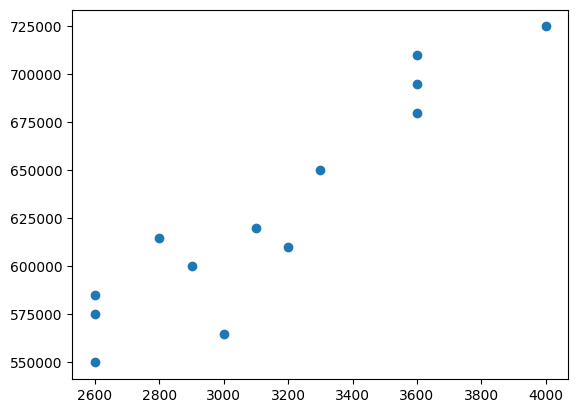

In [31]:
plt.scatter(df['area'],df['price'])

using pandas we will make dummies variable

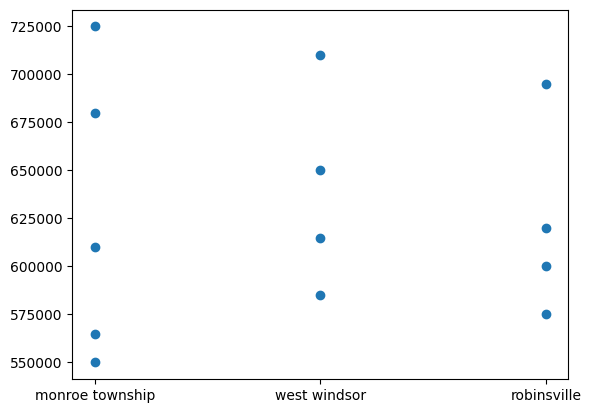

In [32]:
plt.scatter(df['town'],df['price'])

In [33]:
dummies=pd.get_dummies(df['town'])
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [34]:
df_concat=pd.concat([df,dummies],axis=1)

In [35]:
df_concat

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [36]:
df_concat.drop(['town'],axis=1,inplace=True)

In [37]:
df_concat

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
df_concat

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [43]:
final_data=df_concat.drop(['robinsville'],axis=1)

In [44]:
final_data

,area,price,monroe township,west windsor
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,0,0


In [47]:
x_train=final_data.drop(['price'],axis=1)

In [48]:
y_train=final_data['price']

In [53]:
model=LinearRegression()

In [61]:
guess=model.fit(x_train,y_train)

In [62]:
guess.predict([[4000,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([717366.1578155])

In [63]:
guess.predict([[3600,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([692293.59277574])

In [65]:
x_prdicted=guess.predict(x)

In [76]:
x_actual=final_data['price']

In [74]:
x_predicted = x_prdicted.reshape(-1, 1)

In [78]:
model.score(x_train,y_train)

0.9573929037221872

array([], dtype=float64)

array([], dtype=float64)

In [82]:
x_predicted

array([[539709.73984091],
       [590468.71640508],
       [615848.20468716],
       [666607.18125133],
       [717366.1578155 ],
       [579723.71533005],
       [605103.20361213],
       [668551.92431735],
       [706621.15674048],
       [565396.15136531],
       [603465.38378844],
       [628844.87207052],
       [692293.59277574]])